In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
df = pd.read_csv("employee_attrition_dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


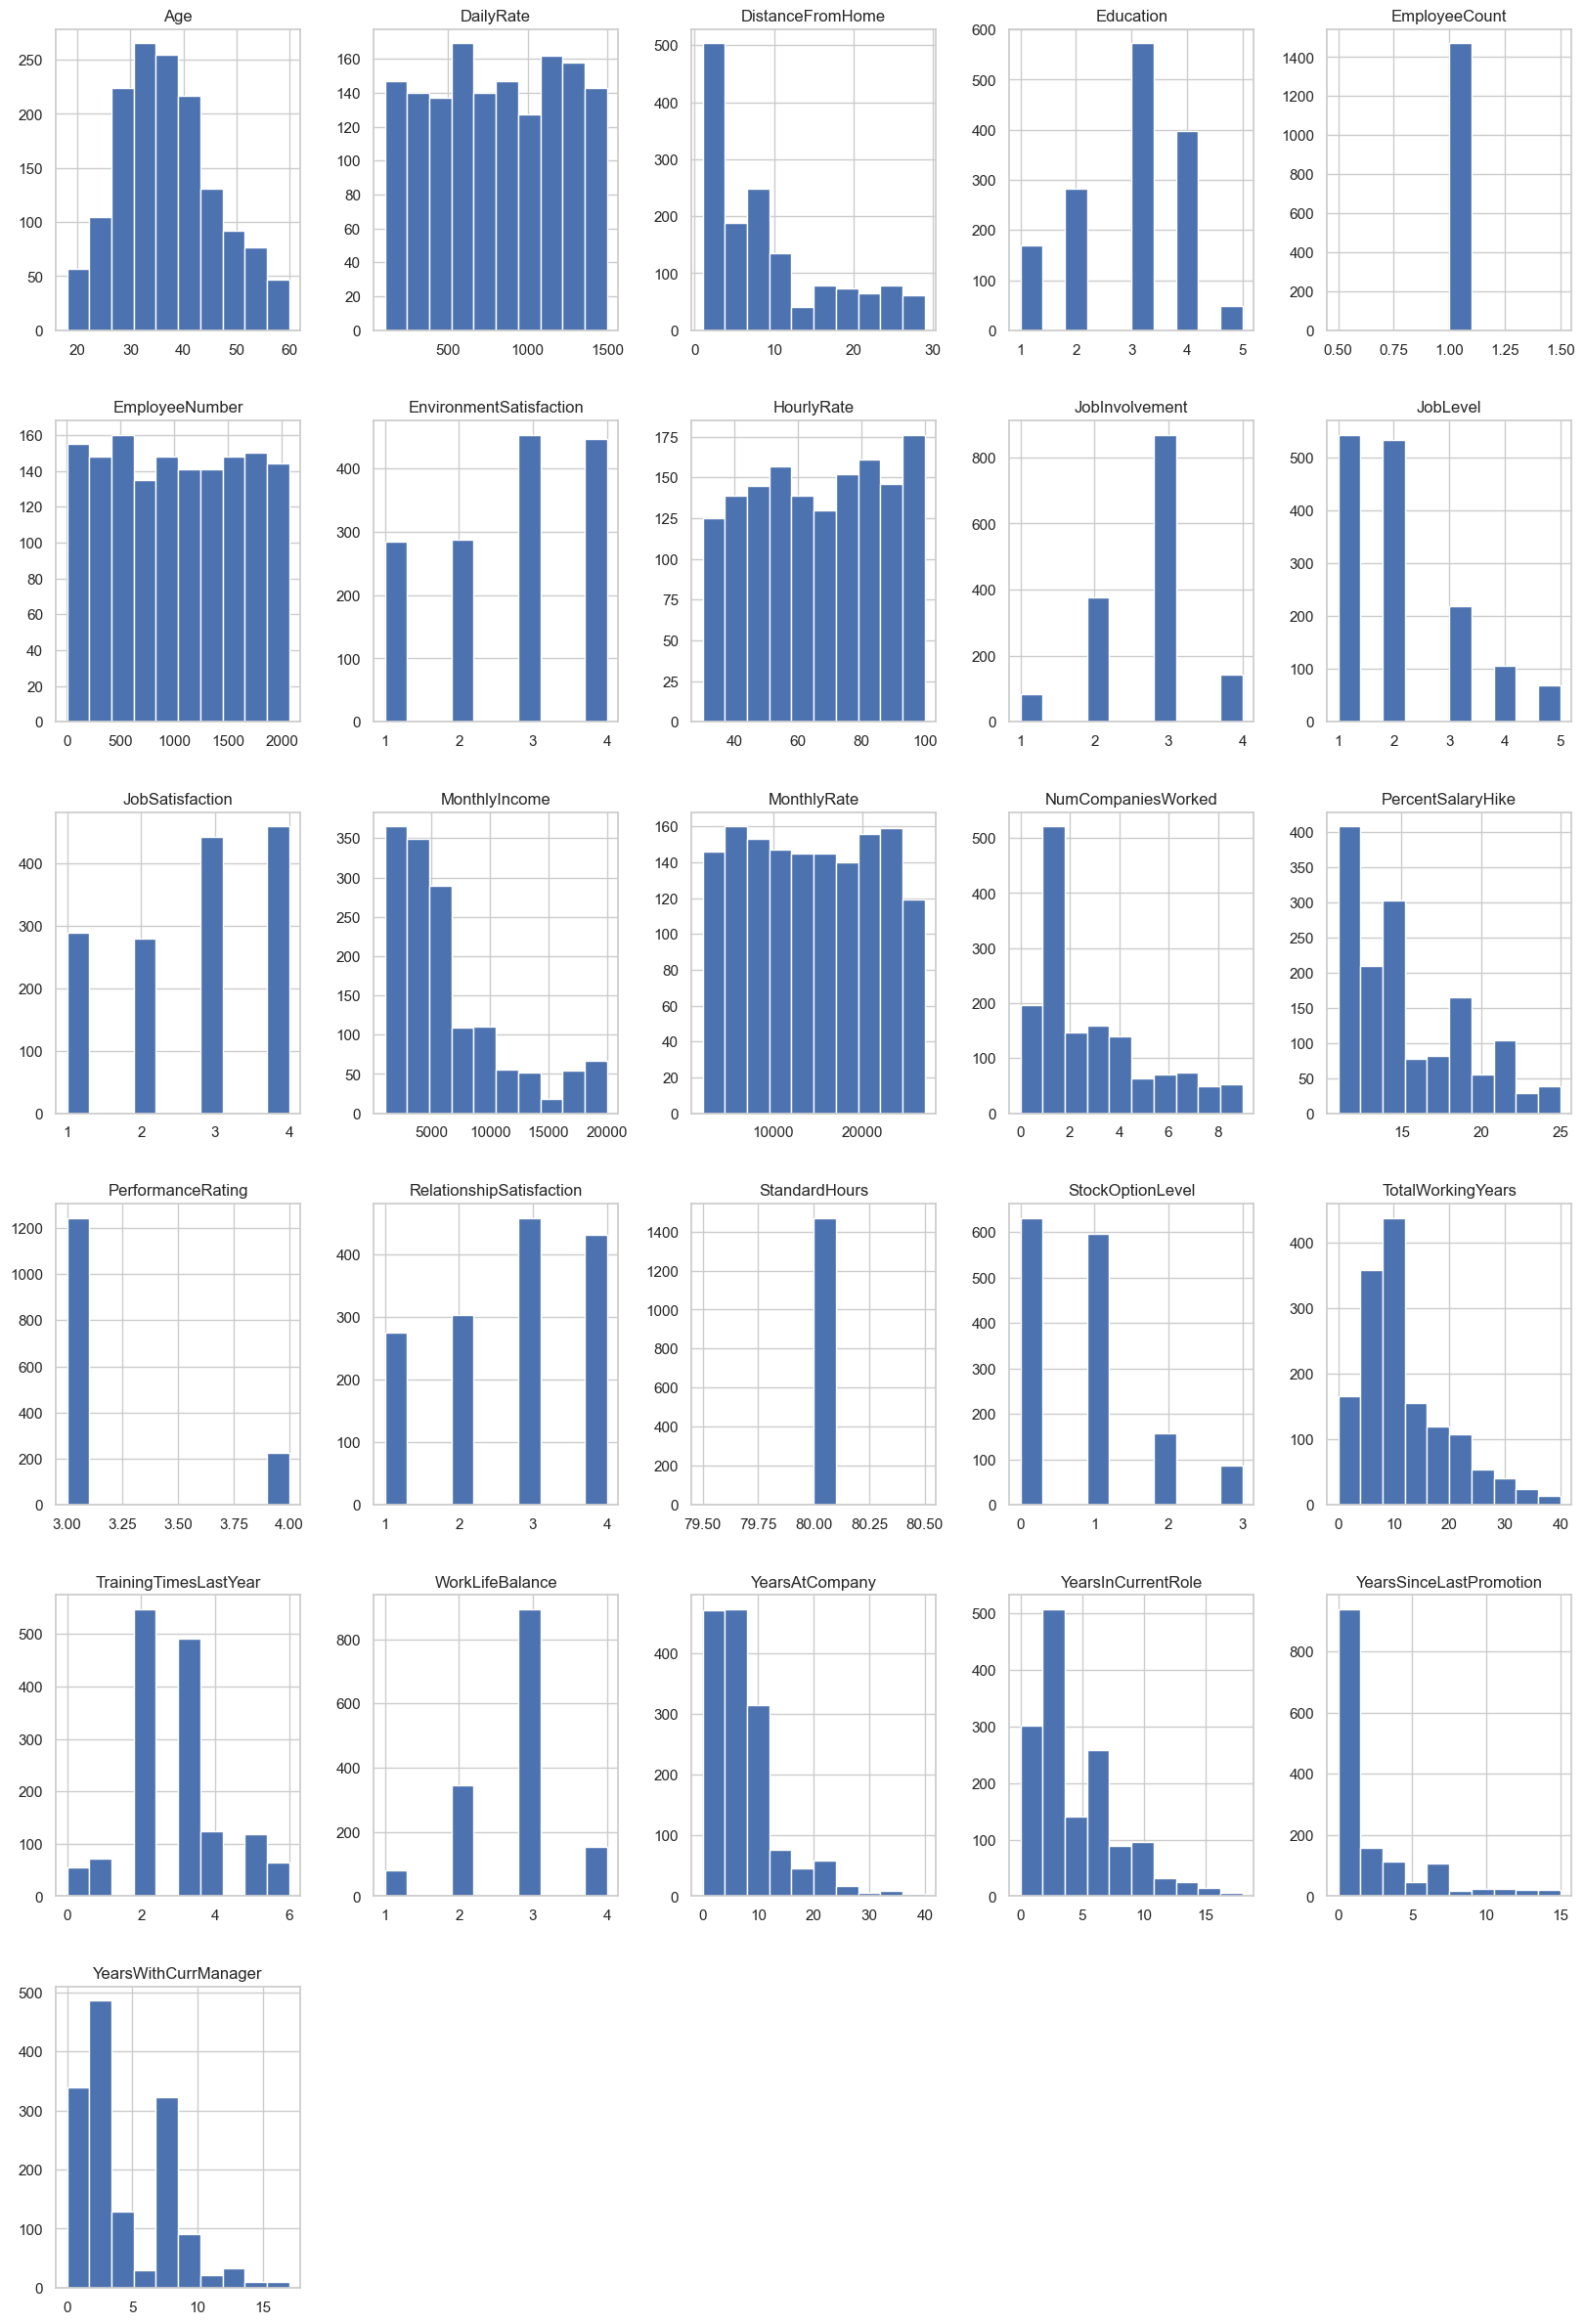

In [4]:
df.hist(figsize = (20, 30))
plt.show()

In [5]:
df.shape

(1470, 35)

In [6]:
# dropping columns that do not contribute in anyway to the analysis
df.drop(columns = ["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], inplace = True)

In [7]:
df.shape

(1470, 31)

In [8]:
# number of unique elements in each column
for i in df.columns:
    print(f"Columns Name: {i}")
    print(f"Number Of Unique Elements = {df[i].nunique()}")
    print()

Columns Name: Age
Number Of Unique Elements = 43

Columns Name: Attrition
Number Of Unique Elements = 2

Columns Name: BusinessTravel
Number Of Unique Elements = 3

Columns Name: DailyRate
Number Of Unique Elements = 886

Columns Name: Department
Number Of Unique Elements = 3

Columns Name: DistanceFromHome
Number Of Unique Elements = 29

Columns Name: Education
Number Of Unique Elements = 5

Columns Name: EducationField
Number Of Unique Elements = 6

Columns Name: EnvironmentSatisfaction
Number Of Unique Elements = 4

Columns Name: Gender
Number Of Unique Elements = 2

Columns Name: HourlyRate
Number Of Unique Elements = 71

Columns Name: JobInvolvement
Number Of Unique Elements = 4

Columns Name: JobLevel
Number Of Unique Elements = 5

Columns Name: JobRole
Number Of Unique Elements = 9

Columns Name: JobSatisfaction
Number Of Unique Elements = 4

Columns Name: MaritalStatus
Number Of Unique Elements = 3

Columns Name: MonthlyIncome
Number Of Unique Elements = 1349

Columns Name: Mon

In [9]:
# number of unique elements in categorical columns
for i in df.columns:
    if df[i].dtype == "object":
        print(f"Column Name: {i}")
        print(f"Number Of Unique Elements = {df[i].nunique()}")
        print()

Column Name: Attrition
Number Of Unique Elements = 2

Column Name: BusinessTravel
Number Of Unique Elements = 3

Column Name: Department
Number Of Unique Elements = 3

Column Name: EducationField
Number Of Unique Elements = 6

Column Name: Gender
Number Of Unique Elements = 2

Column Name: JobRole
Number Of Unique Elements = 9

Column Name: MaritalStatus
Number Of Unique Elements = 3

Column Name: OverTime
Number Of Unique Elements = 2



In [10]:
# label encoding all the columns with Number Of Elements = 2
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["Attrition"] = encoder.fit_transform(df["Attrition"])
df["Gender"] = encoder.fit_transform(df["Gender"])
df["OverTime"] = encoder.fit_transform(df["OverTime"])

df["Attrition"].unique(), df["Gender"].unique(), df["OverTime"].unique()

(array([1, 0]), array([0, 1]), array([1, 0]))

In [11]:
df.shape

(1470, 31)

In [12]:
# OHE
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], drop_first = True)
df.shape

(1470, 34)

In [13]:
# value count of the target column
df["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [14]:
df["Attrition"].value_counts(normalize = True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

In [15]:
# separating independent and dependent columns
x = df.drop(columns = ["Attrition"])
y = df["Attrition"]
x.shape, y.shape

((1470, 33), (1470,))

In [16]:
# train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1102, 33), (368, 33), (1102,), (368,))

In [17]:
# target encoding "EducationField", "JobRole" columns
import category_encoders

encoder = category_encoders.TargetEncoder(cols = ["EducationField", "JobRole"])
x_train = encoder.fit_transform(x_train, y_train)
x_test = encoder.transform(x_test)

In [18]:
# unsampling using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sampling_technique = SMOTE()
x_sm, y_sm = sampling_technique.fit_resample(x_train, y_train)
print(f"Resampled dataset shape {Counter(y_sm)}")

Resampled dataset shape Counter({0: 913, 1: 913})


In [19]:
# saving training and testing data using pickle
import pickle

with open("x_sm.pkl", "wb") as file:
    pickle.dump(x_sm, file)

with open("y_sm.pkl", "wb") as file:
    pickle.dump(y_sm, file)

with open("x_test.pkl", "wb") as file:
    pickle.dump(x_test, file)

with open("y_test.pkl", "wb") as file:
    pickle.dump(y_test, file)